# **Text Summarizer for News Articles (NLP)**


>Using a text summarizer for news articles helps save time by providing quick overviews of important points, improves understanding by focusing on key details, and makes it easier to stay informed without reading lengthy articles.

>This project can be scaled up by performing sentiment analysis on the summarized text to identify if the article is biased, and by detecting hate speech to prevent such articles from being published online. Which we have included in this project.


In [1]:
#this is only to wrap the output neatly , nothing related to text summarizer
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [2]:
# Importing the Natural Language Toolkit (NLTK) library, which provides tools for working with human language data (text).
import nltk

# Importing the stopwords module from NLTK, which contains a list of common words (like "the", "is", "in") that are usually filtered out
#in text processing.
from nltk.corpus import stopwords

# Importing the word_tokenize and sent_tokenize functions from NLTK to split text into words and sentences, respectively.
from nltk.tokenize import word_tokenize, sent_tokenize

# Importing Matplotlib's pyplot module, which provides a MATLAB-like interface for creating static, animated, and interactive visualizations
#in Python.
import matplotlib.pyplot as plt

# Importing the WordCloud module from the wordcloud library, which is used to generate word clouds (visual representations of text data).
from wordcloud import WordCloud, STOPWORDS

#Used for sentiment analysis. It provides polarity (how positive or negative a text is) and subjectivity (how subjective or objective a text is) scores.
from textblob import TextBlob

#Used for advanced NLP tasks like hate speech detection.
from transformers import pipeline


In [3]:
# Download necessary NLTK resources

nltk.download('stopwords')
#Stopwords are frequently occurring words in a language that are frequently omitted from natural language processing (NLP) tasks due to
#their low significance for deciphering textual meaning.

nltk.download('punkt')
#This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
# collocations, and words that start sentences. It must be trained on a large collection of plaintext in the target language before
#it can be used.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
# Function to read a text file
def read_file(filepath):
    with open(filepath, 'r') as file:
        return file.read()

# List of file paths to be summarized
filepaths = ["file1.txt", "file2.txt"]  # Add your file paths here

text = read_file(filepaths[0])  # Read the first file
print(text)  # Print the text

The IMD has forecast light to moderate rain on June 29, issuing a yellow alert for the day, and moderate to heavy rain on June 30, with an orange alert.
New Delhi: Pre-monsoon showers on Wednesday kept Delhi’s maximum temperature below 40°C for the second successive day, but kept humidity levels high, said the India Meteorological Department (IMD).
The weather agency also announced the arrival of monsoon over large parts of northwest India over the next three to four days, but the list did not specify a date for Delhi, indicating that monsoon will not arrive on its usual date of June 27.
In a seven-day forecast for the Capital, the Met department has forecast rain till the end of the month, with the showers expected to intensify on the last two days of the month, which could signify the arrival of monsoon, said weather experts.
The weather agency has forecast light to moderate rain in Delhi on June 29, issuing a yellow alert for the day, and moderate to heavy rain on June 30, issuing a

In [6]:
# Get the list of stopwords from NLTK
stopWords = set(stopwords.words("english"))
print(stopWords)  # Print the stopwords

{"she's", 'same', 're', "didn't", 'only', 'few', 'before', 'here', 'own', 'such', 'again', 'wasn', 'down', 'doing', 'theirs', 'had', 'each', "isn't", 'how', 'mightn', 'there', 'its', 'which', "you'd", "shan't", 'was', 'it', 'weren', 'to', 'needn', 'hers', 'does', 'our', 'don', 'if', 'during', "shouldn't", 'mustn', 'doesn', 'won', 'now', 'from', 'that', 'just', 'her', "mightn't", 'have', "should've", 'other', 'up', 'for', 'y', 'me', 'why', 'whom', "don't", 'll', 'aren', 'some', 'more', 'did', 'against', 'off', 'so', 'the', 'herself', 'as', 'ain', 'couldn', 'being', 'himself', 'than', 'will', 'themselves', "you'll", 'we', 'him', 'when', 'very', 'too', 'your', 'ourselves', 'd', 'having', 'with', "won't", 'through', 'or', 'yourselves', "wasn't", "it's", 'this', 'because', 'after', 'she', "you've", "doesn't", 'both', "mustn't", 'ma', 'my', 'been', 'about', 'can', "weren't", 'hadn', 'by', 'do', 'ours', 'm', 'yourself', 'yours', 'on', "hadn't", 'them', 'until', 'and', 'didn', 'what', 'above',

In [7]:
# Tokenize the text into words
words = word_tokenize(text)
print(words)  # Print the tokenized words

['The', 'IMD', 'has', 'forecast', 'light', 'to', 'moderate', 'rain', 'on', 'June', '29', ',', 'issuing', 'a', 'yellow', 'alert', 'for', 'the', 'day', ',', 'and', 'moderate', 'to', 'heavy', 'rain', 'on', 'June', '30', ',', 'with', 'an', 'orange', 'alert', '.', 'New', 'Delhi', ':', 'Pre-monsoon', 'showers', 'on', 'Wednesday', 'kept', 'Delhi', '’', 's', 'maximum', 'temperature', 'below', '40°C', 'for', 'the', 'second', 'successive', 'day', ',', 'but', 'kept', 'humidity', 'levels', 'high', ',', 'said', 'the', 'India', 'Meteorological', 'Department', '(', 'IMD', ')', '.', 'The', 'weather', 'agency', 'also', 'announced', 'the', 'arrival', 'of', 'monsoon', 'over', 'large', 'parts', 'of', 'northwest', 'India', 'over', 'the', 'next', 'three', 'to', 'four', 'days', ',', 'but', 'the', 'list', 'did', 'not', 'specify', 'a', 'date', 'for', 'Delhi', ',', 'indicating', 'that', 'monsoon', 'will', 'not', 'arrive', 'on', 'its', 'usual', 'date', 'of', 'June', '27', '.', 'In', 'a', 'seven-day', 'forecast',

In [8]:
# Function to create a frequency table for words
def create_frequency_table(text):
    words = word_tokenize(text)
    freqTable = dict()
    for word in words:
        word = word.lower()
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1
    return freqTable

In [9]:
# Function to create a dictionary to keep the score of each sentence based on word frequency
def get_sentence_value(sentences, freqTable):
    sentenceValue = dict()
    for sentence in sentences:
        for word, freq in freqTable.items():
            if word in sentence.lower():
                if sentence in sentenceValue:
                    sentenceValue[sentence] += freq
                else:
                    sentenceValue[sentence] = freq
    return sentenceValue


In [10]:
# Function to calculate the average score of sentences
def get_average_sentence_value(sentenceValue):
    sumValues = 0
    for sentence in sentenceValue:
        sumValues += sentenceValue[sentence]
    average = int(sumValues / len(sentenceValue))
    return average


In [11]:
# Function to create a summary
def create_summary(sentences, sentenceValue, average):
    summary = ''
    for sentence in sentences:
        if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.2 * average)):
            summary += " " + sentence
    return summary

In [12]:
# Initialize the sentiment analysis and hate speech detection models
sentiment_analyzer = pipeline('sentiment-analysis')
hate_speech_detector = pipeline('text-classification', model='unitary/toxic-bert')


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/811 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/174 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Summary of file1.txt:
 New Delhi: Pre-monsoon showers on Wednesday kept Delhi’s maximum temperature below 40°C for the second successive day, but kept humidity levels high, said the India Meteorological Department (IMD). The weather agency also announced the arrival of monsoon over large parts of northwest India over the next three to four days, but the list did not specify a date for Delhi, indicating that monsoon will not arrive on its usual date of June 27. Delhi-NCR may see heavy rainfall spell during this period, based on which the onset of the monsoon could be declared,” said Mahesh Palawat, vice president at Skymet, a private weather forecasting service. In its monsoon bulletin on Wednesday evening, IMD said conditions were currently favourable for the southwest monsoon to advance into “the remaining parts of the North Arabian Sea, Gujarat and Madhya Pradesh; some more parts of Rajasthan; remaining parts of Chhattisgarh, West Bengal, Jharkhand and Bihar; most parts of East Uttar

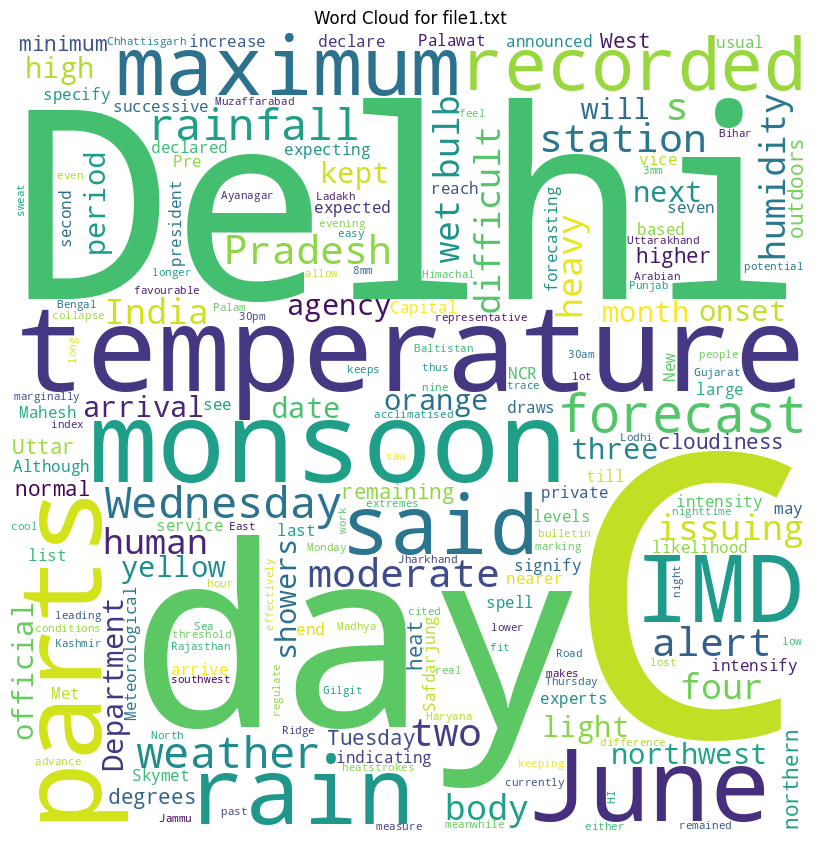

Summary of file2.txt:
 The BJP claimed Prime Minister Narendra Modi had foreseen that the Congress would reinstate Sam Pitroda after the elections. The BJP claimed Prime Minister Narendra Modi had foreseen that the Congress would reinstate Sam Pitroda after the elections. He has now been reinstated as chairman of the Indian Overseas Congress, exposing the hypocrisy of the Congress party and its leaders," the Bharatiya Janata Party (BJP) said on X.

Sam Pitroda, a close confidant of the Leader of the Opposition, Rahul Gandhi, resigned from the post on May 8 after making a string of controversial remarks that gave the BJP ammunition to attack the Congress.


Sentiment of file2.txt:
Polarity: 0.55, Subjectivity: 0.95


Hate Speech Detection for file2.txt:
[{'label': 'toxic', 'score': 0.002376790391281247}]




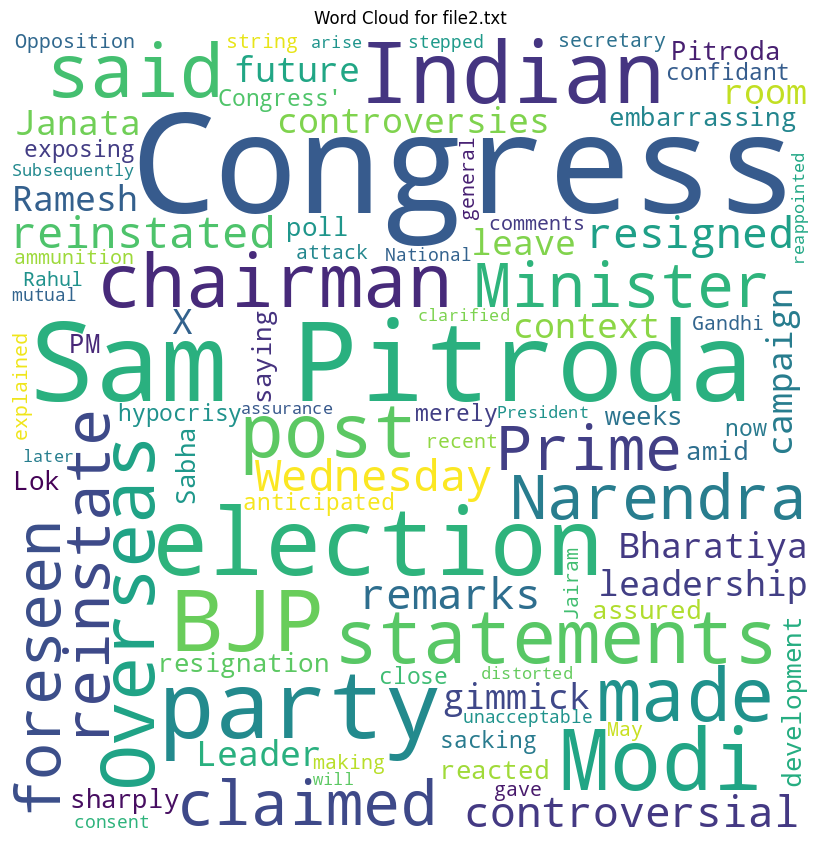

In [13]:
# Process each file individually
for filepath in filepaths:
    # Read the file
    text = read_file(filepath)

    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # Create the frequency table
    freqTable = create_frequency_table(text)

    # Get the sentence values
    sentenceValue = get_sentence_value(sentences, freqTable)

    # Get the average sentence value
    average = get_average_sentence_value(sentenceValue)

    # Create the summary
    summary = create_summary(sentences, sentenceValue, average)
    print(f"Summary of {filepath}:")
    print(summary)
    print("\n")

    # Perform sentiment analysis on the summary
    sentiment = TextBlob(summary).sentiment
    print(f"Sentiment of {filepath}:")
    print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")
    print("\n")

#Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
#Polarity, also known as orientation is he emotion expressed in the sentence. It can be positive, neagtive or neutral.
#Subjectivity is also a float which lies in the range of [0,1], indicating the extent of personal expression(opinions, emotions, or judgments)
#in text,objective ones state facts. Subjectivity applies to explanatory articles, analyzed in context.


    # Detect hate speech in the summary
    hate_speech_result = hate_speech_detector(summary)
    print(f"Hate Speech Detection for {filepath}:")
    print(hate_speech_result)
    print("\n")

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=STOPWORDS,
                          min_font_size=10).generate(text)

    # Plot the WordCloud image
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f"Word Cloud for {filepath}")
    plt.show()